In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [38]:
df=pd.read_csv("/content/Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [39]:
# Exploratory Data Analysis:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print("\nTarget Classes:\n",df["type"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
             hair 

In [40]:
print(df.columns)

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


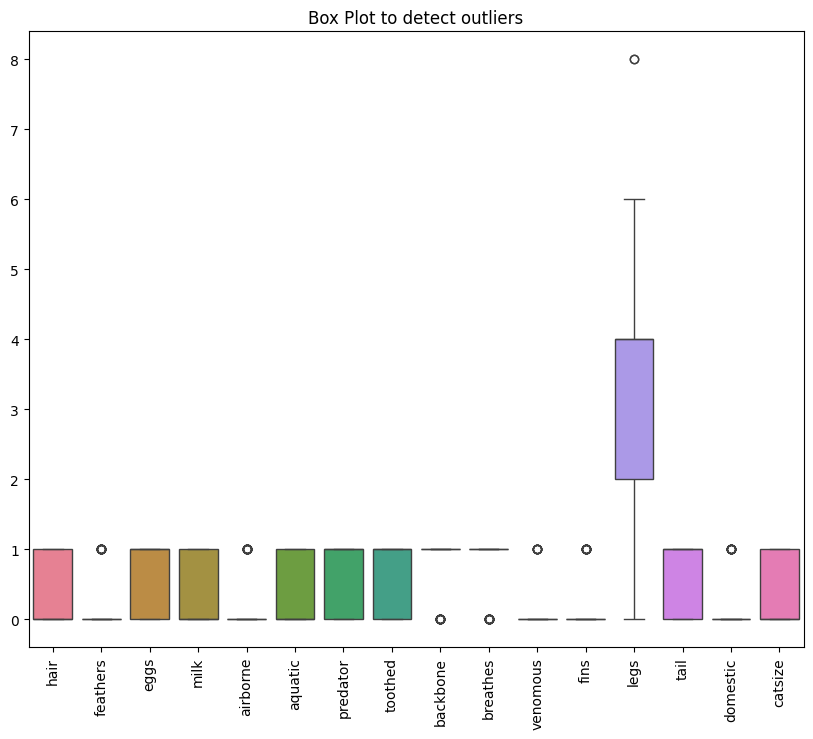

In [68]:
# Visualization:
plt.figure(figsize=(10,8))
sns.boxplot(data=df.drop(["animal name","type"],axis=1))
plt.title("Box Plot to detect outliers")
plt.xticks(rotation=90)
plt.savefig("boxplot.png")
plt.show()

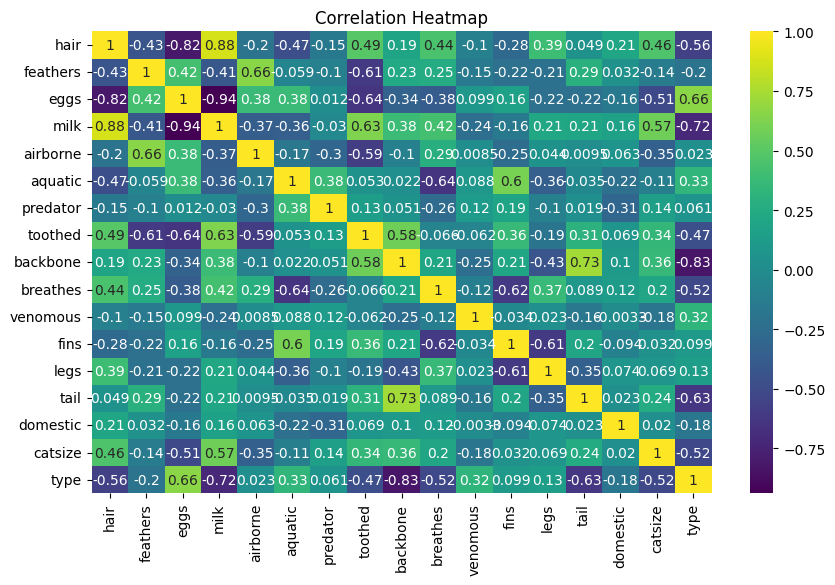

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis")
plt.title("Correlation Heatmap")
plt.savefig("heatmap.png")
plt.show()

In [43]:
# Preprocessing:
X=df.drop(columns=["animal name","type"])
y=df["type"]

In [44]:
# Feature scaling:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [45]:
# Train-test:
X_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [46]:
# knn classifier:
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn.fit(X_train,y_train)
y_pred=knn.predict(x_test)

In [47]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test,y_pred))
print("\nAccuracy Score:\n")
print(accuracy_score(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21


Confusion Matrix:

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]

Accuracy Score:

0.9523809523809523


In [48]:
# Decision Boundary Visualization(PCA):
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [49]:
X_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [50]:
knn_pca=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn_pca.fit(X_train_pca,y_train_pca)
y_pred_pca=knn_pca.predict(x_test_pca)

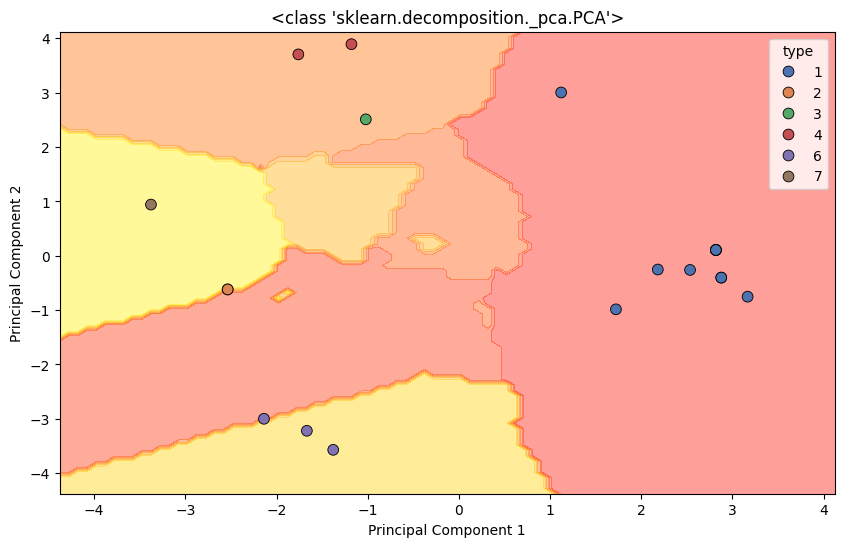

In [70]:
from typing import ChainMap
# Plot Decision Boundary:
def plot_dec_boundary(model,X,y,title):
  x_min,x_max=X.min(axis=0)[0].min()-1,X.max(axis=0)[0].max()+1
  y_min,y_max=X.min(axis=0)[0].min()-1,X.max(axis=0)[0].max()+1
  xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
  Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z=Z.reshape(xx.shape)
  plt.figure(figsize=(10,6))
  plt.contourf(xx,yy,Z,alpha=0.4,cmap="autumn")
  sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,palette="deep",s=60,edgecolor="k")
  plt.title(PCA)
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.savefig("decision_boundary.png")
  plt.show()

plot_dec_boundary(knn_pca,x_test_pca,y_test_pca,"KNN Boundary")